# **FOOD RECIPE CLASSIFICATION WITH "WHAT'S COOKING" DATASET**
DATA*6200: Introduction to Data Science

**Contributors**: Santosh Kumar Satapathy, Kshitiz Pokhrel

**Under the Guidance of**: Dr. Nica Mihai

# **EXECUTIVE SUMMARY**

**Introduction to the Project**: \\
This project is centered on the Kaggle "What's Cooking" dataset. Our aim was to develop a method to predict the type of cuisine from a list of ingredients. This project not only allowed us to explore the techniques in data science that involve text based data, but also provided us with culinary knowledge, offering insights into how ingredients are uniquely combined in different cuisines.

**Dataset Overview**: \\
The dataset originates from Kaggle's "What's Cooking" challenge and comprises an array of recipes categorized under 20 different cuisines. Each recipe includes a detailed list of ingredients. This dataset is not just a collection of recipes; it's a diverse representation of global culinary practices, making it a valuable resource for data-driven culinary analysis.

**Data Preparation and Cleaning Process**: \\

1. **Data Cleaning**: The first crucial step was to clean the dataset. This meant removing any special characters and standardizing the format of the ingredient lists to ensure consistency and accuracy in the data.

2. **Word Simplification (WordNetLemmatizer)**: We used WordNetLemmatizer, a tool in Natural Language Processing (NLP), to simplify the words. The lemmatizer converts various forms of a word to its base form, ensuring uniformity in the dataset. For example, 'chopped' and 'chopping' would both be simplified to 'chop'.

3. **Breaking Down Ingredients (Tokenization)**: We applied tokenization, an NLP technique, to split ingredient lists into individual numbers. This process transforms complex text data into simpler, analyzable units, making it easier to analyze the dataset.

**Techniques and Models Employed**: \\

1. **Word Relationships (Word2Vec)**: This model creates 'embeddings' or multi-dimensional representations of words, helping us understand how different ingredients relate to each other in a culinary context.

2. **Sequential Pattern Learning (SimpleRNN)**: SimpleRNN, a type of neural network, is used for understanding sequences. In our case, it analyzes the order and combination of ingredients to predict the cuisine. It's like learning a recipe step by step.

3. **Advanced Sequence Learning (LSTM)**: LSTM, or Long Short-Term Memory, is a more sophisticated version of RNN. It's particularly effective in learning from longer sequences of ingredients, which is crucial for complex, longer recipes.

**Model Training and Evaluation**: \\
- We divided the dataset into two parts: one for training the models and the other for validation.
- The models were fine-tuned, meaning we adjusted their settings to improve their performance.
- We used various metrics like accuracy, precision, recall, and F1-Score to evaluate how well each model performed.
Following is a brief overview of what each of these metrics mean:
  - **Accuracy:** The percentage of correct predictions.
  - **Precision:** The percentage of correct positive predictions out of the total positive predictions.
  - **Recall:** The percentage of actual positive cases correctly predicted.
  - **F1-Score:** A balance between precision and recall, useful for imbalanced datasets.
  - **ROC-AUC Curve:** Graph that illustrates the trade-off between true positive and false positive rates.
  - **AUC (Area Under the Curve):** A numerical measure of the model's overall ability to distinguish between different outcomes.

**Results on Training Set:** \\
- Model 1 (SimpleRNN):
  - Accuracy: 71.87%
  - Precision: 0.7282
  - Recall: 0.7187
  - F1-score: 0.7193
  - Micro-average AUC: 0.9908

- Model 2 (Word2Vec + LSTM):
   - Accuracy: 73.18%
   - Precision: 0.7406
   - Recall: 0.7318
   - F1-Score: 0.7324
   - ROC-AUC: 0.9929



**Final Model and Result:** \\
Final model was obtained using both techniques by using optimal parameters. Both final models were used to make predictions on the test data and the predictions were uploaded to Kaggle Leaderboard. Following are the results obtained from both models. \\

RESULTS FROM KAGGLE

- Model 1 (SimpleRNN): 0.73079
- Model 2 (Word2Vec + LSTM-RNN) : 0.75382

From above results we can clearly see that Model 2 performed better on the test set than Model 1. We will discuss how Model 2 is better than Model 1 in the End.

Let's start!

# **SETTING UP**

## Importing Necessary Libraries

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Mounting Google Drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Importing training and test datasets

In [ ]:
# Specifying Filepaths for training and test datasets

# Filepath for training data
train_file_path = '/content/drive/My Drive/train.json'

# Filepath for test data
test_file_path = '/content/drive/My Drive/test.json'

In [ ]:
# Loading Train and Test Data from JSON Format into Pandas Dataframes for easier processing

data_train = pd.read_json(train_file_path)
data_test = pd.read_json(test_file_path)

drive.flush_and_unmount()

# **EXPLORATORY DATA ANALYSIS**

## First look into the Datasets

Lets start by examining both Datasets

In [ ]:
data_train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [ ]:
data_test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [ ]:
print("Train set size is:",data_train.shape[0])

Train set size is: 39774


In [ ]:
print("Test set size is:",data_test.shape[0])

Test set size is: 9944


In [ ]:
print("Total Cuisines:",data_train['cuisine'].nunique())

Total Cuisines: 20


The features in our dataset is a list of ingredients and the Label is the Cuisine the ingredients belong to. In this dataset, we have total 20 cuisines we need to predict from.

We have approximately 40,000 samples in our Training Data and 10,000 samples in Test Data.

Here 'id' is just an identifier for each sample which we do not need. So we can delete this.

In [ ]:
del data_train['id']
del data_test['id']

## **Visualizing the Data**


### Response Variable

Our response variable is the cuisine, given the list of ingredients. Let's visualize how the cuisines are distributed using a horizontal bar graph.

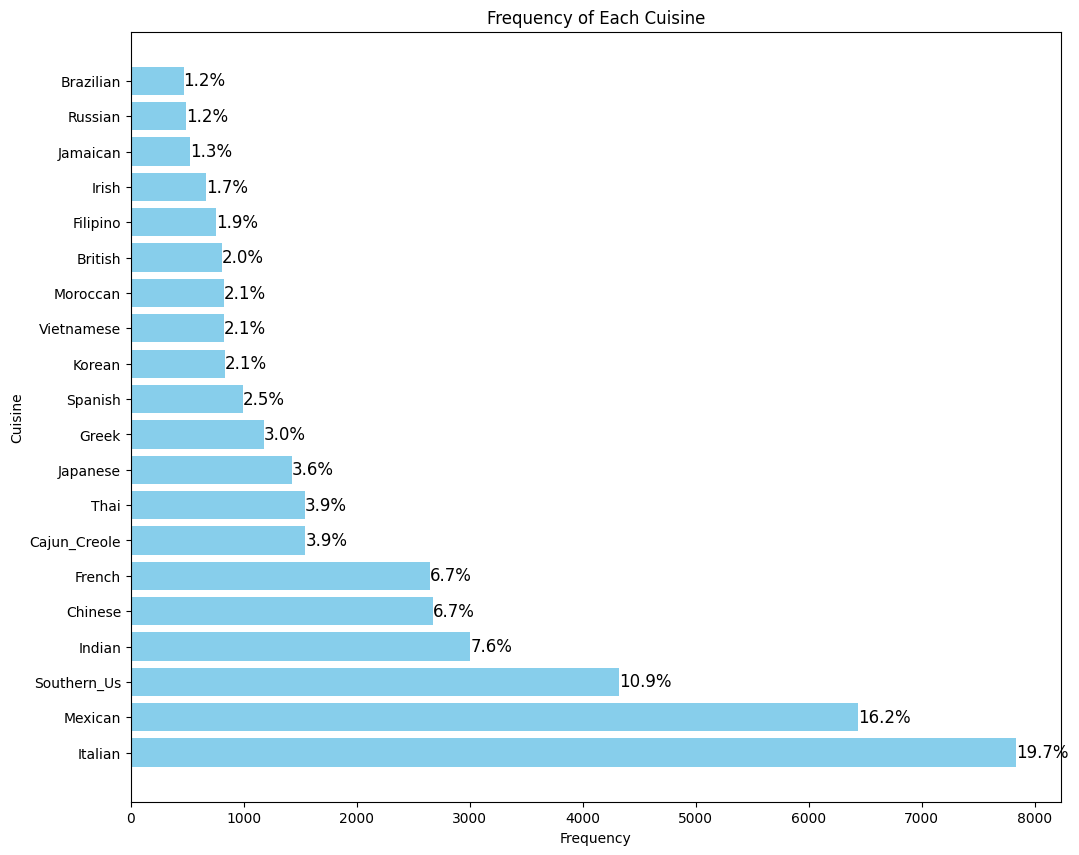

In [ ]:
# Get the total number of data points in the dataset
total_data_points = len(data_train)

# Calculate the frequency and percentage for each cuisine
cuisine_freq = data_train['cuisine'].value_counts()
cuisine_percentage = (cuisine_freq / total_data_points) * 100

# Convert the series to a dataframe
cuisine_freq = cuisine_freq.reset_index()
cuisine_percentage = cuisine_percentage.reset_index()

plt.figure(figsize=(12, 10))

# Create a horizontal bar chart
bar = plt.barh(cuisine_freq['index'].str.title(), cuisine_freq['cuisine'], color='skyblue')

# Add percentage labels on the right of each bar
for i, bar_instance in enumerate(bar):
    plt.text(bar_instance.get_width() + 0.3, bar_instance.get_y() + bar_instance.get_height() / 2,
             s="{:.1f}%".format(cuisine_percentage['cuisine'][i]),
             ha='left',
             va='center',
             color='black',
             fontsize=12)

plt.title('Frequency of Each Cuisine')
plt.xlabel('Frequency')
plt.ylabel('Cuisine')

plt.show()

The bar graph above shows a distribution of recipes by cuisine in the dataset. It clearly shows that Italian cuisine has the highest representation with 19.7% of the recipes. Mexican cuisine follows at 16.2%, and together with Southern US (10.9%) and Indian (7.6%) cuisines, these four categories constitute over half of the dataset.
The rest of the cuisines are more evenly distributed, each representing between 1.2% to 6.7% of the data. The least represented cuisines are Brazilian and Russian, each making up only 1.2% of the recipes.

### Top Ingredients
To get a visual understanding of the most popular ingredients within our recepie datatset, we employ a word cloud. This visualization allows us to see which elements are most commonly used, with the size of each word corresponding to its frequency of occurrence.

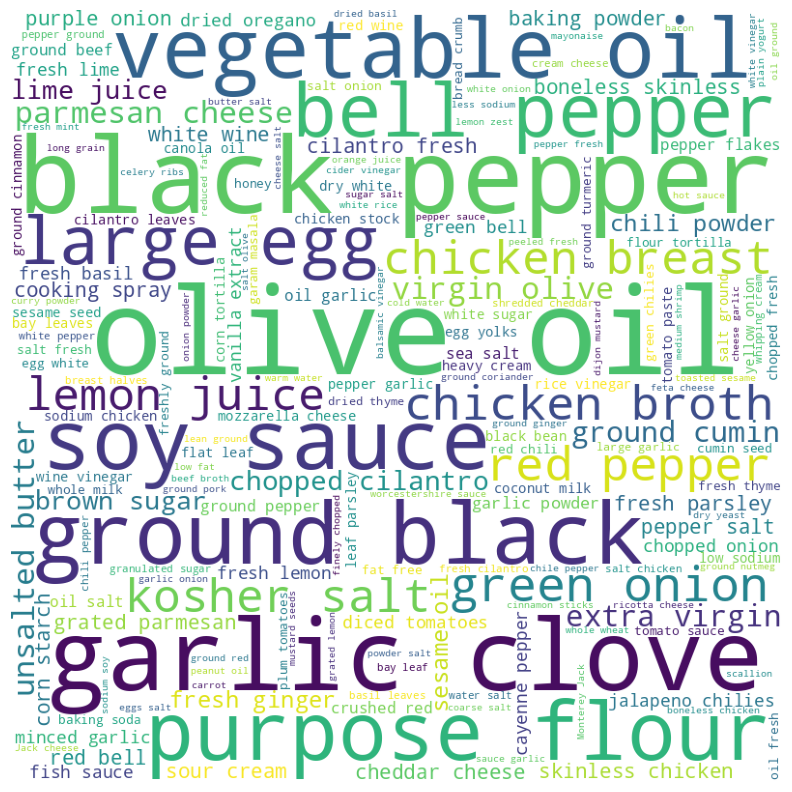

In [ ]:
# WordCloud library will help us create visual representations of word frequencies in the dataset, offering a non-technical way to explore and understand the most common ingredients in the recipes.
from wordcloud import WordCloud

# Combining all ingredients into a single string for the word cloud
all_ingredients = ', '.join([', '.join(ingredients) for ingredients in data_train['ingredients']])

# Creating a Word Cloud for the ingredients
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_ingredients)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 1)

plt.show()

The above word cloud illustrates the frequency of ingredients in our recipe dataset. Commonly used ingredients like "garlic," "olive oil," "onion," "pepper," and "salt" are most prominent, indicating their commonality and importance in cooking. A variety of other ingredients, including herbs like "basil" and spices such as "cumin," appear in smaller sizes, showing their specific but less frequent use.

# **DATA PRE-PROCESSING**

As we established earlier, the dataset in use provides a list of cuisines along with their respective ingredients. Thankfully, our dataset is complete with no missing data. However, as is often the case with textual data, there could be some inconsistencies, think of these as small typographical errors or extra unnecessary symbols that we need to remove to ensure our dataset is neat and consistent. \\
 To achieve this, we will first start with cuisines and remove any underscores that may be present. Then we move on to the ingredients where we define a function to remove any unnecessary characters such as hyphens, commas, underscores etc. and apply the function to both training and test datasets.

In [ ]:
# Preprocessing the ingredients

data_train['cuisine'] = data_train['cuisine'].str.replace('_','')

def preprocess_ingredients(ingredients_list):
    cleaned_ingredients = []
    for ingredient in ingredients_list:
        # Lowercasing and removing unnecessary characters (like punctuation)
        cleaned = ingredient.lower().replace('-', ' ').replace('/', ' ').replace('(', '').replace(')', '').replace('_', '')
        cleaned_ingredients.append(cleaned)
    return cleaned_ingredients

# Applying the preprocessing to each recipe's ingredients
data_train['cleaned_ingredients'] = data_train['ingredients'].apply(preprocess_ingredients)
data_test['cleaned_ingredients'] = data_test['ingredients'].apply(preprocess_ingredients)

# **LEMMATIZATION**

After removing the unnecessary characters and ensuring that our data is textually consistent, we can now move on to further clean the ingredients.

Here, we will do two things:
1. We will use Regex to remove any characters that are outside the English Letter Alphabets. Regex, short for Regular Expression is a powerful tool that can understand complex patterns in text and helps in sorting and fixing words or sentences.
2. Set all alphabets to lowercase to avoid case match errors.
3. Next, we'll use a tool called WordNetLemmatizer to refine our ingredients list further. Here's a brief on how it works: \\



Part of the Natural Language Toolkit (NLTK), a collection of tools for handling text, the WordNetLemmatizer specializes in streamlining words. It does this by converting various forms of a word into its most basic form, known as the 'lemma'. This process, called lemmatization, is crucial in making text data more general and easier to work with. \\



For instance, it simplifies different forms of a word, like "running" and "ran," to a single form: "run." In our case, dealing with a dataset full of ingredients and culinary terms, using WordNetLemmatizer ensures our data is more uniform and straightforward, making it simpler to analyze and understand. \\




In the context of a dataset, particularly one involving text data such as recipes or any other natural language dataset, using the WordNetLemmatizer offers several advantages: \\


**Smaller Vocabulary:** Lemmatization shrinks words to their simplest form. This is really helpful in big datasets because it makes the list of different words smaller and easier to manage.

**Better Learning for Models:** When words are in their basic form, it's easier for computer models to understand and apply this knowledge to new, different data. This is because the models see a more regular and simplified version of words.

**Clearer Insights from Data:** Using simpler forms of words helps us get clearer ideas and patterns from our data. It's easier to see the main points and trends without getting confused by different versions of the same word.

In short, WordNetLemmatizer is a great tool for preparing text data, making it cleaner and more uniform. This helps improve how well computer models can learn from and understand language.

In [ ]:
# Import nltk
import nltk

# Import WordNetLemmatizer from nltk
from nltk.stem import WordNetLemmatizer

# The 're' library is used for regular expressions, enabling the cleaning and preprocessing of text data by handling special characters, numbers, and other non-essential elements.
import re
import subprocess

# Download and unzip wordnet so that we can use its resources
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/')
    command = "unzip /wordnet.zip -d /"
    subprocess.run(command.split())
    nltk.data.path.append('/')

# Now we can import the NLTK resources
# WordNet is a lexical database for English words, contributing to the lemmatization process by providing word relationships and meanings.
from nltk.corpus import wordnet

lemmetizer = WordNetLemmatizer()

# Remove all characters that are outside A-Z characters list, convert to lowercase and generate lemma of each ingredient
def lemmetization(ls):
    regex = "[^A-Za-z]"
    text = [lemmetizer.lemmatize(re.sub(regex,"",x).lower()) for x in ls]
    return text

# Apply Lemmatization
data_train['cleaned_ingredients'] = data_train['cleaned_ingredients'].apply(lemmetization)
del data_train['ingredients']

data_test['cleaned_ingredients'] = data_test['cleaned_ingredients'].apply(lemmetization)
del data_test['ingredients']

[nltk_data] Downloading package wordnet to /...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data_train

,cuisine,cleaned_ingredients
0,greek,"[romainelettuce, blackolives, grapetomatoes, g..."
1,southernus,"[plainflour, groundpepper, salt, tomato, groun..."
2,filipino,"[egg, pepper, salt, mayonaise, cookingoil, gre..."
3,indian,"[water, vegetableoil, wheat, salt]"
4,indian,"[blackpepper, shallot, cornflour, cayennepeppe..."
...,...,...
39769,irish,"[lightbrownsugar, granulatedsugar, butter, war..."
39770,italian,"[kraftzestyitaliandressing, purpleonion, brocc..."
39771,irish,"[egg, citrusfruit, raisin, sourdoughstarter, f..."
39772,chinese,"[bonelesschickenskinlessthigh, mincedgarlic, s..."



Looking at the Ingredients column before and after our modifications, it's clear that all ingredients are now neatly organized and uniformly formatted. Additionally, items previously listed with quantities, such as "2 Eggs", have been simplified to just "eggs," etc.

In [ ]:
# Create and maintain a copy of our datasets for Model 2 later.

data_train_model2 = data_train.copy()
data_test_model2 = data_test.copy()

# **MODEL TRAINING**

## **Model 1**: **Multi-Class Classification model using Recurrent Neural Networks**
Now that our dataset is ready, we will build our first **Multi-Class Classification model using Recurrent Neural Networks**. Before we train the model, there are some preliminary steps wee need to follow. Below is the overview of the steps we are following.  \\


**Label Encoding of Cuisines:** We'll use Sklearn's LabelEncoder to assign unique numerical labels, from 1 to 20, to each of the 20 different cuisines in our dataset for effective multi-class classification.

**Creating a Training-Validation Split:**  We'll split our training dataset to create a separate validation dataset. This validation set will be 20% of our total samples.

**Tokenization of Ingredients:** One of the key challenges in processing our dataset is the diverse range of ingredients. To address this, we'll tokenize each ingredient, assigning a unique numerical value to each. For example, 'Eggs' might be assigned the number 1, 'Onions' the number 2, and so on. This process transforms our textual data into a format that's suitable for neural network processing, allowing the model to understand and learn from the patterns in the data.

**Data Padding for Uniformity:** Our recipes vary in the number of ingredients they contain. To standardize this for our RNN, we'll implement padding. We'll first determine the maximum number of ingredients present in any single recipe within our dataset. Then, for recipes with fewer ingredients, we'll add zeros to their ingredient list until they match this maximum length. This process is known as padding. For instance, if the longest recipe has 15 ingredients and another has only 5, we'll add 10 zeros to the shorter recipe. Padding is a critical step in ensuring that each input to our RNN has a uniform length, enabling the network to process the data efficiently and accurately.

### **Label Encoding**

Our dataset comprises 20 different cuisines, each needing a unique identifier. We'll employ the LabelEncoder from the Sklearn library for this task. This encoder will transform the cuisine names into a numerical format, assigning each cuisine a unique number between 1 and 20. This step is crucial for our model to perform multi-class classification effectively.



In [ ]:
# LabelEncoder is utilized to encode categorical labels (cuisines) into a numerical format, enabling the model to understand and learn from the target variable.
from sklearn.preprocessing import LabelEncoder

# Create instance of Label Encoder
label_encoder = LabelEncoder()

# Fit the Encoder on Training Data Labels
label_encoder.fit(data_train['cuisine'])

# Transform Labels
data_train['cuisine'] = label_encoder.transform(data_train['cuisine'])

# Function to join all ingredients to feed into tokenizer
def join_ingredients(ingredients_):
    ingredients_joined = ' '.join(ingredients_)
    return ingredients_joined

data_train['cleaned_ingredients'] = data_train['cleaned_ingredients'].apply(join_ingredients)
data_test['cleaned_ingredients'] = data_test['cleaned_ingredients'].apply(join_ingredients)

In [ ]:
# Create a Dictionary of Mapped Labels that will help us in the end to convert predicted logits to actual Cuisine Names

label_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_name_mapping = pd.DataFrame(list(label_name_mapping.items()), columns=['Original_Label', 'Encoded_Label'])

### **Training-Validation Split**

To validate the performance of our model, we need to test it on unseen data. We'll split our training dataset to create a separate validation dataset. This validation set will be 20% of our total samples, amounting to approximately 8,000 recipes. Such a split ensures that we have a way to test our model's accuracy and generalization capability.

In [ ]:
# The train_test_split function from scikit-learn is used to split the dataset into training and validation sets, ensuring fair evaluation of the model's performance.
from sklearn.model_selection import train_test_split

# Split the Training Data into 80:20 Ratio to measure Validation Dataset Accuracy Metrics of our Model
x_train , x_val ,y_train , y_val = train_test_split(data_train['cleaned_ingredients'].values , data_train['cuisine'].values , test_size=0.2, random_state = 42)


### **Tokenization**

Tokenization is an important step for preparing text data for our model. It basically breaks down the text we have - in our case, ingredients - into number denotions. We will use the Keras `Tokenizer` for this job.

Here's how it works: The tokenizer first splits the text into these smaller parts, or 'tokens'. Then, it standardizes this text, maybe by turning everything lowercase, getting rid of punctuation, and sorting out any special characters. This makes sure that the words are consistent and easy for the machine to understand.

An important part of tokenization is creating a vocabulary. The tokenizer does this by giving each unique token a number. This vocabulary is key because it changes our text (the ingredients) into numbers that our model can work with.

When we train our model, the tokenizer looks at all the ingredients in our dataset and maps each word to its number. This step is super important for our task, which is to figure out what cuisine a dish belongs to based on its ingredients.

Later, when we use our model in real life, the tokenizer ensures that any new ingredients it sees are treated the same way as when we trained it. This means the model can accurately predict the cuisine type from new ingredients it hasn't seen before.

In short, tokenization turns our text data into a form that's ready for machine learning. By organizing and standardizing our ingredients into a numerical format, it sets the stage for our model to learn from the data and make good predictions about cuisines.

In [ ]:
# Tokenizer is employed to break down textual data into individual numeric tokens, allowing the model to process and understand the input ingredients more effectively.
from keras.preprocessing.text import Tokenizer

# Determine the Recipe with the maximum character length for Padding other recipes with lesser character length
max_length = int(max(data_train['cleaned_ingredients'].str.len().max(),data_test['cleaned_ingredients'].str.len().max()))

# Create Tokenizer Instance
token = Tokenizer()

# Feed all the words to the tokenizer instance, including words in the Test Dataset
token.fit_on_texts(list(x_train) + list(x_val) + list(data_test['cleaned_ingredients'].values))

# Save the Token Dictionary for later use
word_index = token.word_index
index_word = token.index_word

# Convert all list of ingredients into their tokenized form using texts_to_sequences function of tokenizer which replaces the words with their respective token values.
x_train = token.texts_to_sequences(list(x_train))
x_val = token.texts_to_sequences(list(x_val))
x_test = token.texts_to_sequences(list(data_test.cleaned_ingredients.values))


In [ ]:
print("Maximum Number of Ingredients in both the datasets combined is:",max_length)

Maximum Number of Ingredients in both the datasets combined is: 902


In [ ]:
print("First 5 Tokens in the Dictionary of the Tokenizer created by fitting all the ingredients\n\n",dict(list(word_index.items())[:5]))

First 5 Tokens in the Dictionary of the Tokenizer created by fitting all the ingredients

 {'salt': 1, 'onion': 2, 'oliveoil': 3, 'water': 4, 'garlic': 5}


### **Padding**

Padding plays a critical role in our project, especially when dealing with the varied lengths of ingredient lists. It's a technique that brings a necessary uniformity to our data, which is essential for the effective functioning of our neural network.

Here's a detailed look at how padding works in our context:

> Our dataset comprises ingredient lists of different lengths. Some recipes might have just a few ingredients, while others could have many more. This variation poses a challenge for machine learning models, which typically require inputs of uniform size.

> To overcome this challenge, we use padding. Padding involves appending special tokens, usually zeros, to the end of the shorter sequences in our dataset. This process continues until all sequences match the length of the longest sequence in the dataset.

> By padding the ingredient lists, we ensure that each one is represented as a fixed-size vector. This uniformity is very important for the neural network to process the data efficiently. Without padding, the variable lengths of ingredient lists could lead to inconsistencies and errors during the model training process.

> This leads to improved learning by the neural network, enabling it to better understand and predict cuisines based on the ingredient lists, regardless of their original lengths.


In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Given that all recipes have different length, we will pad each ingredient list, with zeros to makes all the ingredient list of same size of the maximum length + 5
x_train_pad = pad_sequences(x_train, maxlen = (max_length + 5))
x_val_pad = pad_sequences(x_val, maxlen = (max_length + 5))
x_test_pad = pad_sequences(x_test, maxlen = (max_length + 5))



As we can see below, the original first element in the x_train was:

In [ ]:
x_train[0]

[112, 864, 58, 17, 16, 344, 454, 95, 39, 42, 96, 25, 81, 36]

Which is a receipe with 14 ingredients but after padding the list is filled with zeros to make it of length 902+5 = 907, which will be the same for all of the ingredients list in the dataset:

In [ ]:
x_train_pad[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

From above results we can get a visual idea of how padding works.

### **Model Architecture**

In this section, we will be building a neural network using Keras which is  a high-level neural networks API. Here's a detailed explanation of each component and step in the model's architecture:

1. **Sequential Model in Keras**:
   - The Sequential model is a linear stack of layers in Keras, offering a straightforward way to build a neural network. Each layer has weights that correspond to the layer that follows it.
   - In our model, layers are added in sequence, each feeding data into the next.

2. **Embedding Layer**:
   - The Embedding layer is used to transform words into meaningful vectors. In the context of our project, it converts ingredient words into dense vectors that represent their contextual meaning.
   - This layer takes three main parameters:
      - The input dimension, which is the size of our vocabulary (`len(word_index) + 1`).
      - The output dimension, which is the size of the output vectors (200 in our case).
      - The input length, specifying the maximum length of the input sequences (`max_length + 5`).

3. **SimpleRNN Layer**:
   - The SimpleRNN (Simple Recurrent Neural Network) layer is designed for processing sequential data. In our model, it captures the dependencies and patterns in the order of ingredients.
   - We have set up the SimpleRNN with 100 units (neurons). Each unit is a neuron that processes information from the input data and the previously received inputs.

4. **Dense and Activation Layers**:
   - Dense layers, also known as fully connected layers, are the regular deeply connected neural network layers. Here, every input is connected to every output by a weight. In our model, the Dense layer with 20 units corresponds to the 20 different cuisine types we aim to classify.
   - The activation function used is 'softmax', which is particularly suitable for multi-class classification problems. It converts the outputs to probability scores for each class, with the sum of all probabilities being 1.The formula for the softmax function is:
$$ Softmax(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} $$

 Here, $ \mathrm{e}^{x_i} $ represents the exponential of the output score for class $ i $ , and the denominator is the sum of the exponentials of the output scores for all classes.

5. **Model Compilation**:
   - The final step is to compile the model. We use 'Sparse Categorical Crossentropy' as the loss function, which is effective for multi-class classification problems where each class is mutually exclusive.
   - The optimizer 'adam' is chosen for its efficiency in training neural networks. Adam, which stands for Adaptive Moment Estimation, is a type of optimization algorithm - a set of rules or methods used to change the attributes of the neural network, such as weights and learning rate, to reduce losses and improve accuracy. \\

    One of the key reasons for choosing Adam is its ability to deal with 'sparse gradients' and 'noisy problems'. In more straightforward terms, 'sparse gradients' refer to situations where only a few parts of the data contribute to learning at any step, and 'noisy problems' are those where the data or the environment has a lot of randomness or unpredictability. Adam is particularly good at navigating these challenges. \\

     Moreover, Adam stands out because it automatically adjusts the learning rate as training progresses. The learning rate determines how big of a step the model takes during learning. By adjusting the learning rate, Adam ensures that the model learns efficiently and effectively, making it a popular choice for training deep neural networks, which are complex models used for tasks like image and speech recognition, or in our case, cuisine prediction from ingredients.
   - The metric 'accuracy' is used to evaluate the performance of the model during training and testing. It measures how often the predicted class matches the true class of the data.

This architecture effectively combines the strengths of word embeddings and RNNs to analyze and classify text data, making it well-suited for our task of predicting cuisine types from ingredient lists.

In [ ]:
# Sequential models in Keras allow the stacking of neural network layers in a linear manner, providing a straightforward approach to building and understanding deep learning architectures.
from keras.models import Sequential

# Embedding layers in Keras facilitate the incorporation of word embeddings into neural networks, enabling the model to understand the contextual meaning of ingredients.
from keras.layers import Embedding

# SimpleRNN (Simple Recurrent Neural Network) is used for processing sequential data, making it suitable for capturing dependencies in the order of ingredients.
from keras.layers import SimpleRNN

# Dense layers are fully connected layers responsible for the final output, and Activation functions introduce non-linearity into the model, allowing it to learn complex patterns.
from keras.layers import Dense, Activation

# Create a Sequential model
model = Sequential()

# Add an Embedding layer to map words to dense vectors
# 'len(word_index) + 1' is the input dimension (size of the vocabulary)
# '200' is the output dimension (size of the dense vector for each word)
# 'input_length=(max_len + 5)' specifies the maximum length of input sequences
model.add(Embedding(len(word_index) + 1 , 200, input_length = (max_length + 5)))

# Add a SimpleRNN layer with 100 units
model.add(SimpleRNN(100))

# Add a Dense layer with 20 units and softmax activation for multiclass classification
model.add(Dense(20 , activation = 'softmax'))

# Compile the model using Sparse Categorical Crossentropy as the loss function, Adam optimizer, and accuracy as the metric
model.compile(loss = 'SparseCategoricalCrossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
# Display the model summary, providing information on the architecture and parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 907, 200)          1414400   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               30100     
                                                                 
 dense (Dense)               (None, 20)                2020      
                                                                 
Total params: 1446520 (5.52 MB)
Trainable params: 1446520 (5.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


From the above summary, we can see that the neural network is composed of three layers, each serving a specific function in the task of cuisine classification. The first layer is an embedding layer, which is quite large, with over 1.4 million parameters. This suggests it has the capacity to learn detailed representations of the ingredients. The second layer is a SimpleRNN with 100 units, indicating its role in capturing the sequences within the ingredient lists. Lastly, the network concludes with a dense layer of 20 units, corresponding to the 20 unique cuisines in the dataset, using softmax activation to output the final predictions. The total number of parameters in the model exceeds 1.44 million, all of which are trainable, highlighting the model's complexity and potential to learn from the data provided.

### **Model Fitting**

Here, we focused on the efficient training of our neural network, setting the number of epochs to five. An epoch represents one complete cycle through the training dataset, and due to the model's complexity and the dataset's breadth, training can be lengthy.

To expedite the process, we utilized pre-trained weights. We started out with random network layer size and neurons in each layer and other parameters and kept changing each parameter while observing its impact. It's more time-efficient compared to conducting a grid search, which involves extensive trials to determine the best model parameters. A grid search, given its comprehensive nature, would significantly extend the training duration.

The use of pre-trained weights enables us to capitalize on previous learning, shortening the overall training time. We also conducted regular validation checks to monitor and maintain the model's accuracy throughout the training process. This strategic approach ensures a balance between efficient training and maintaining high model performance.

In [ ]:
drive.mount('/content/drive', force_remount=True)

# Load pre-trained weights (if available)
try:
  model.load_weights('/content/drive/My Drive/model_weight_food.h5')
  print("\nHey! Pre-trained Model Weights found, continuing training on it...\n")
except:
  pass

# Train the model on the training data for 5 epochs
# We will use a 'batch_size' of 50 as any more samples in a batch makes the fitting process slower while training on weights.
# 'validation_data=(val_seq_pad, y_val)' provides validation data for monitoring performance during training
# model.fit(x_train_pad, y_train , epochs = 5 , batch_size = 50, validation_data=(x_val_pad, y_val))

# Save the trained model weights to a file for future use
# model.save_weights('/content/drive/My Drive/model_weight_food.h5')

drive.flush_and_unmount()

Mounted at /content/drive

Hey! Pre-trained Model Weights found, continuing training on it...



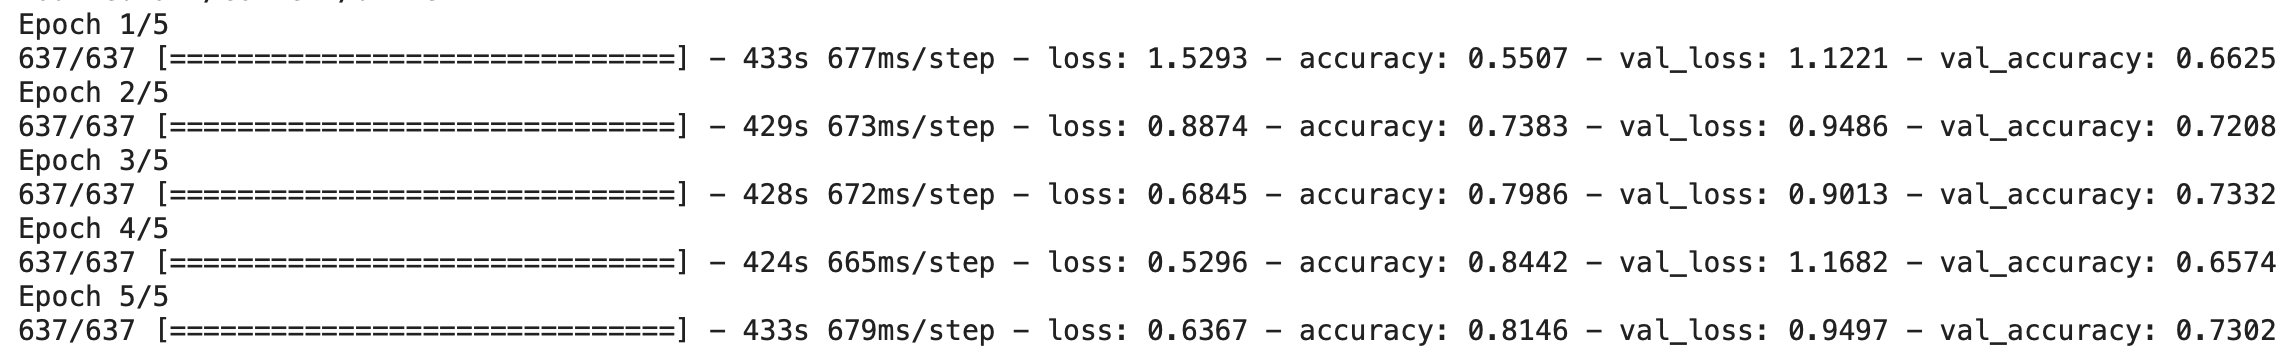

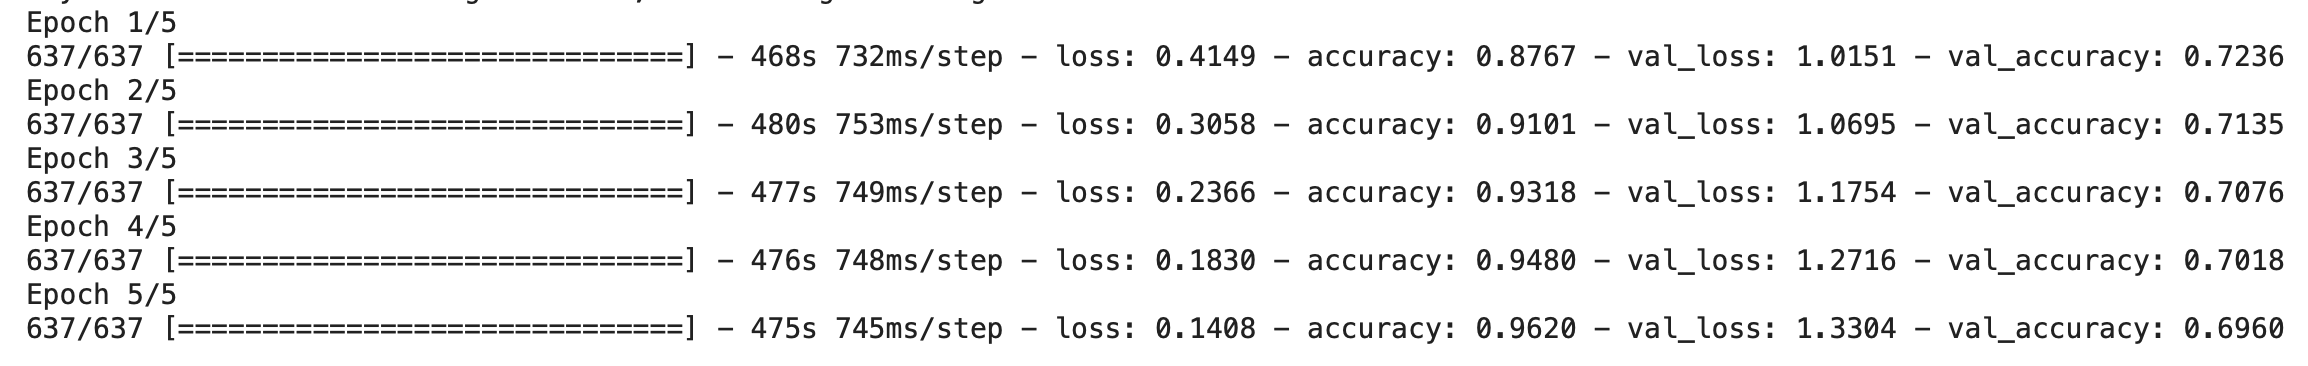

### **Underfitting vs Overfitting**


In the context of our project, underfitting and overfitting are important considerations. Underfitting occurs when a model is too simple to capture the underlying pattern in the data. Overfitting, on the other hand, is when a model learns the training data too well, including its noise and outliers. In our neural network, we aim to strike the perfect balance: a model that is complex enough to learn from the data but not so intricate that it fails to generalize to new, unseen data. Regular validation checks and the use of pre-trained weights help us avoid both underfitting and overfitting, guiding the model to perform well on both the training set and the unseen test data from Kaggle.

Below we use the training metrics and plot Loss and Accuracy graphs to visualize underfitting and overfitting.

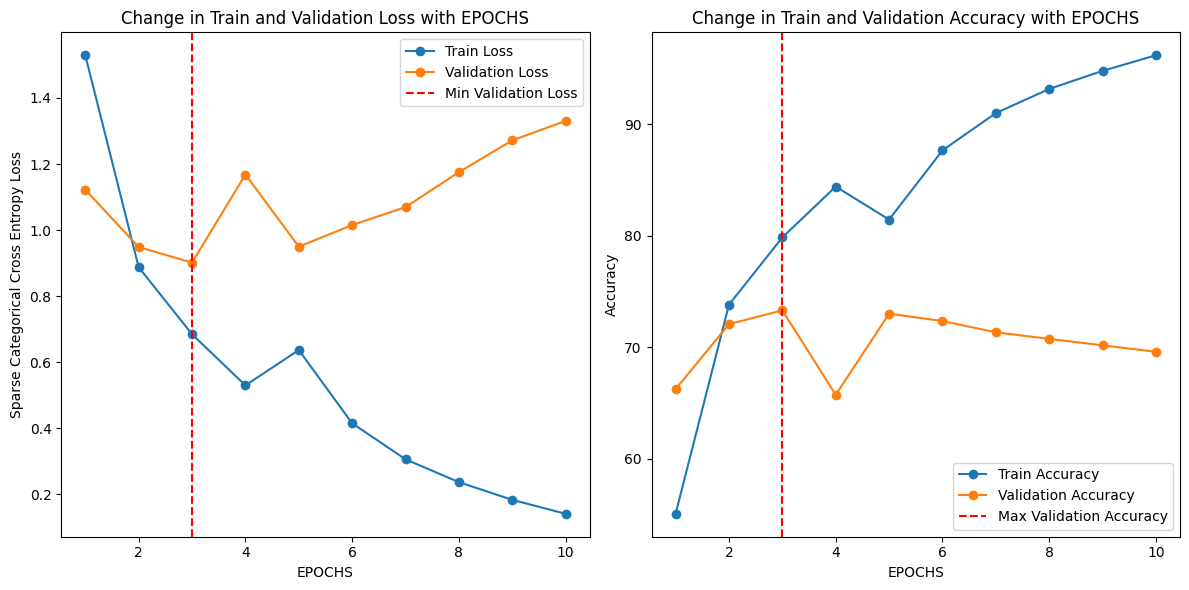

In [ ]:
# Store the training metrics
training_metrics = np.array([['1.5293','0.5507','1.1221','0.6625'],
                    ['0.8874','0.7383','0.9486','0.7208'],
                    ['0.6845','0.7986','0.9013','0.7332'],
                    ['0.5296','0.8442','1.1682','0.6574'],
                    ['0.6367','0.8146','0.9497','0.7302'],
                    ['0.4149','0.8767','1.0151','0.7236'],
                    ['0.3058','0.9101','1.0695','0.7135'],
                    ['0.2366','0.9318','1.1754','0.7076'],
                    ['0.183','0.948','1.2716','0.7018'],
                    ['0.1408','0.962','1.3304','0.696']])

training_metrics = pd.DataFrame(training_metrics,columns=['Train - Sparse Categorical Cross Entropy Loss','Train - Accuracy','Validation - Sparse Categorical Cross Entropy Loss','Validation - Accuracy'])

training_metrics['Train - Accuracy'] = training_metrics['Train - Accuracy'].astype(float)*100
training_metrics['Validation - Accuracy'] = training_metrics['Validation - Accuracy'].astype(float)*100
training_metrics['Train - Sparse Categorical Cross Entropy Loss'] = training_metrics['Train - Sparse Categorical Cross Entropy Loss'].astype(float)
training_metrics['Validation - Sparse Categorical Cross Entropy Loss'] = training_metrics['Validation - Sparse Categorical Cross Entropy Loss'].astype(float)

custom_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Visual 1: Comparing Train and Validation Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(custom_epochs, training_metrics['Train - Sparse Categorical Cross Entropy Loss'], label='Train Loss', marker='o')
plt.plot(custom_epochs, training_metrics['Validation - Sparse Categorical Cross Entropy Loss'], label='Validation Loss', marker='o')
plt.axvline(x=training_metrics['Validation - Sparse Categorical Cross Entropy Loss'].idxmin()+1, color='r', linestyle='--', label='Min Validation Loss')
plt.legend()
plt.title('Change in Train and Validation Loss with EPOCHS')
plt.xlabel('EPOCHS')
plt.ylabel('Sparse Categorical Cross Entropy Loss')

# Visual 2: Comparing Train and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(custom_epochs, training_metrics['Train - Accuracy'], label='Train Accuracy', marker='o')
plt.plot(custom_epochs, training_metrics['Validation - Accuracy'], label='Validation Accuracy', marker='o')
plt.axvline(x=training_metrics['Validation - Accuracy'].idxmax()+1, color='r', linestyle='--', label='Max Validation Accuracy')
plt.legend()
plt.title('Change in Train and Validation Accuracy with EPOCHS')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

The graphs plotted above display the model's learning behavior over multiple epochs of training.

1. Loss Graph :

   In the loss graph, we observe that the training loss consistently decreases, which is a positive indication that the model is learning from the training data. However, the validation loss initially decreases and then starts to increase, suggesting that the model may be beginning to overfit. The point of minimum validation loss is crucial as it often represents the optimal state of the model before overfitting becomes significant. \\

2. Accuracy Graph :

  The accuracy graph shows an overall increase in both training and validation accuracy, which is a good sign that the model is correctly learning to classify the data. However, there is a noticeable gap between the training accuracy and the validation accuracy, with the training accuracy being higher. This discrepancy could indicate that while the model is becoming more confident in its predictions on the training data, it's not performing as well on data it hasn't seen before which is another potential sign of overfitting. The peak of validation accuracy marks the epoch after which the model doesn't improve on the validation set, which is a critical point for stopping the training to avoid overfitting.

The optimal number of epochs to be used, as seen from above graphs, is `3` in order to avoid underfitting and overfitting.

### **Final Model**

For our final SimpleRNN model, here is what we have done:

Initially, an Embedding layer is used to convert words into dense vectors, a common technique for effectively handling the text data with large vocabulary. This is followed by a SimpleRNN layer with 100 units, which processes sequences and captures the context within the data which is essential for understanding the structure of language. A Dense layer with a softmax activation function is then added, indicating the model's objective to classify the data into one of 20 possible categories. The model is compiled with Sparse Categorical Crossentropy and the Adam optimizer, highlighting a focus on a multi-class classification framework and efficient training. Training is conducted for a predetermined optimal number of epochs to avoid overfitting, ensuring the model remains generalizable to unseen test data.

In [ ]:
drive.mount('/content/drive', force_remount=True)

model = Sequential()

# Add an Embedding layer to map words to dense vectorsces
model.add(Embedding(len(word_index) + 1 , 200, input_length = (max_length + 5)))

# Add a SimpleRNN layer with 100 units
model.add(SimpleRNN(100))

# Add a Dense layer with 20 units and softmax activation for multiclass classification
model.add(Dense(20 , activation = 'softmax'))

# Compile the model using Sparse Categorical Crossentropy as the loss function, Adam optimizer, and accuracy as the metric
model.compile(loss = 'SparseCategoricalCrossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Load pre-trained weights (if available)
try:
  model.load_weights('/content/drive/My Drive/model_weight_food_final.h5')
  print("\nHey! Pre-trained Model Weights found, continuing training on it...\n")
except:
  pass

# Train only till the best epochs determined above
best_epochs = 3

# Fit the model on Both Training AND Validation Dataset
# for e in range(best_epochs):
#   model.fit(x_train_pad, y_train , epochs = 1 , batch_size = 50)
#   model.fit(x_val_pad, y_val , epochs = 1 , batch_size = 50)

# Save the trained model weights to a file for future use
# model.save_weights('/content/drive/My Drive/model_weight_food_final.h5')

drive.flush_and_unmount()

Mounted at /content/drive

Hey! Pre-trained Model Weights found, continuing training on it...



### **Model Evaluation**

Now we move on to evaluating our model. First we get the predictions and exaluate the model based on metrics like accuracy, Precision, Recall, F1 Score and AUC.

Making Predictions:

In [ ]:
# Perform predictions using the trained model on the training data
prediction = model.predict(x_train_pad)
prediction = pd.DataFrame(prediction)

# Create a copy of the prediction DataFrame for further processing
prediction2 = prediction.copy()

# Round predicted probabilities to the nearest integer (0 or 1)
for i in prediction2.columns:
  prediction2[i] = np.where(prediction2[i].round(0)==1,1,prediction2[i])

# This loop helps fix cases in prediction probabilities where the predicted probabilities is less than 50% for all the cuisines
# In that case, this loops selects the cuisine corresponding to maximum probability
for i in prediction2.index:
  if (prediction2.loc[i,:]==1).nunique()==1:
    prediction2.loc[i,prediction2.loc[i,:].argmax()] = 1

# Map binary values to corresponding original labels using label_name_mapping
for i in prediction2.columns:
  try:
    prediction2[i] = np.where(prediction2[i].round(0)==1,label_name_mapping[label_name_mapping['Encoded_Label']==i]['Original_Label'].values[0],0)
  except:
    pass

# Create a new column 'cuisine' to store the predicted cuisine labels
prediction2['cuisine'] = ''

# Assign predicted cuisine labels to the 'cuisine' column based on unique non-zero values in each row
for i in prediction2.index:
  prediction2['cuisine'] = np.where(prediction2.index==i,[j for j in prediction2.iloc[i,:].unique() if j != '0'][0],prediction2['cuisine'])

# Extract the 'cuisine' column and modify specific values where we had removed Underscores during cleaning process
prediction2 = prediction2[['cuisine']]
prediction2['cuisine'] = np.where(prediction2['cuisine']=='southernus','southern_us',prediction2['cuisine'])
prediction2['cuisine'] = np.where(prediction2['cuisine']=='cajuncreole','cajun_creole',prediction2['cuisine'])

prediction2 = np.array(prediction2['cuisine'])

# Encode the ground truth labels using label_name_mapping
y_train_encoded = []
for i in y_train:
  y_train_encoded.append(label_name_mapping[label_name_mapping['Encoded_Label']==i]['Original_Label'].values[0])

y_train_encoded = np.array(y_train_encoded)

995/995 [==============================] - 135s 135ms/step


### **Confusion Matrix and Evaluation Metrics**

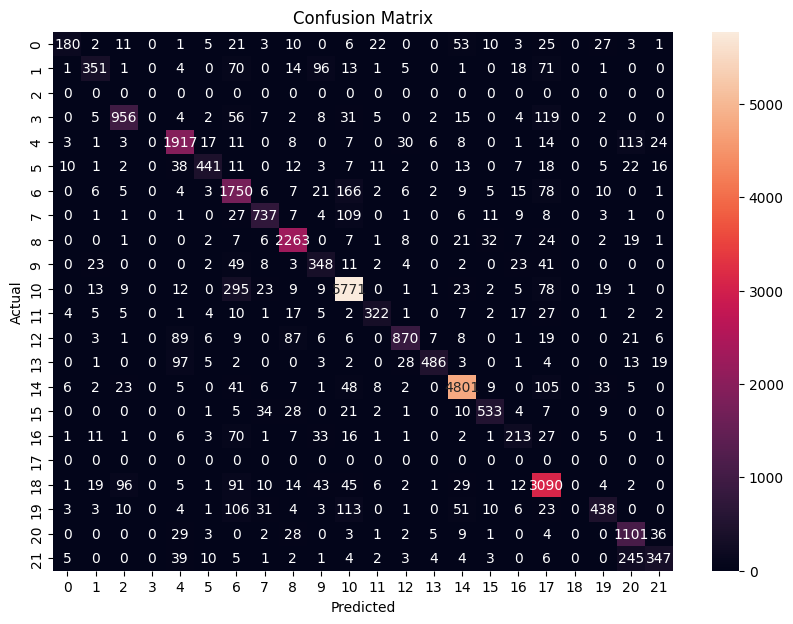

Accuracy: 71.8721518589522
Precision: 0.7282790124486728
Recall: 0.7187215185895219
F1-score: 0.7193796885081296
Micro-average AUC: 0.9908729657418034


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_train_encoded, prediction2)

# Plotting the confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculating Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(y_train_encoded, prediction2) * 100
precision = precision_score(y_train_encoded, prediction2, average='weighted')
recall = recall_score(y_train_encoded, prediction2, average='weighted')
f1 = f1_score(y_train_encoded, prediction2, average='weighted')

# ROC-AUC is not directly applicable to multi-class classification, so we calculate micro-average ROC-AUC
y_train_one_hot = np.eye(len(np.unique(y_train)))[y_train]  # One-hot encoding
auc = roc_auc_score(y_train_one_hot, prediction, average='micro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Micro-average AUC: {auc}')

From the confusion matrix and the metrics seen above, we can deduce the following facts :

**Accuracy:** At approximately 71.87%, it indicates a good level of overall correct predictions by the model.

**Precision:** At around 0.7282, it shows that the model has a good rate of true positive predictions out of all positive predictions it made, meaning it is very reliable when it claims a sample belongs to a certain class.

**Recall:** Also known as sensitivity, the recall is approximately 0.7187, which suggests that the model is capable of identifying all relevant instances within the actual classes.

**F1-score:** With a score close to 0.7193, the model demonstrates a balanced relationship between precision and recall, indicating fairly strong performance even in imbalanced datasets where some classes are underrepresented.

**Micro-average AUC:** The micro-average AUC score is about 0.9908, which is very close to 1, the maximum possible score.

One thing to be noted here is that we have used Micro-Average AUC instead of regular AUC here. Micro-Average AUC looks at how well our model predicts all the recipes, treating each recipe as either predicted correctly or not, and then gives us a single measure of how good our model is across all recipes. Since we have multiple classes and imbalance in the dataset among the recepies, we use Micro-Average AUC instead of regular AUC.






### **ROC Curve**

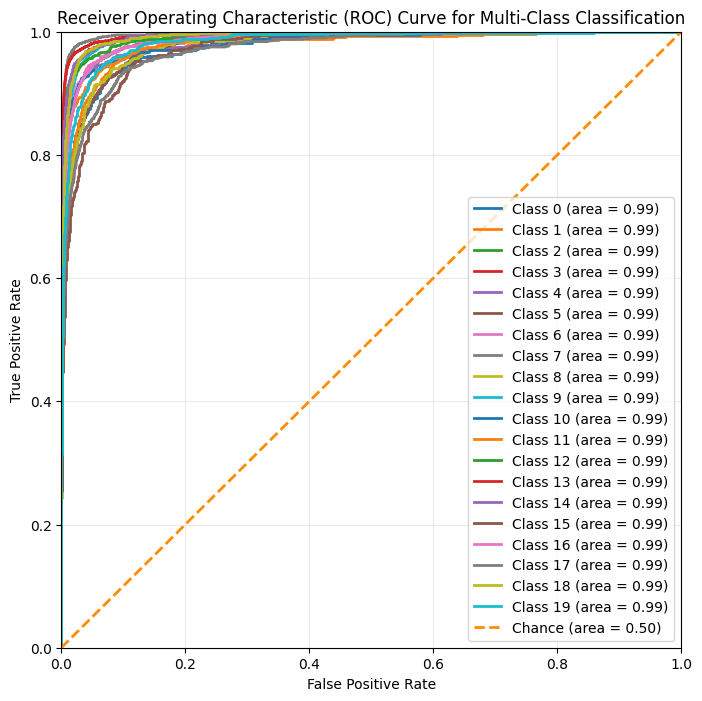

In [ ]:
fpr = dict()
tpr = dict()
micro_auc = dict()

for i in range(len(np.unique(y_train_encoded))):
    fpr[i], tpr[i], _ = roc_curve(y_train_one_hot[:, i], np.array(prediction)[:, i])
    micro_auc[i] = roc_auc_score(y_train_one_hot, prediction, average='micro')

# Plot the ROC curves
plt.figure(figsize=(8, 8))
for i in range(len(np.unique(y_train_encoded))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {micro_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--', label='Chance (area = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.grid(alpha=0.25)
plt.show()

The ROC curve above shows the model's performance in the multi-class classification. With each class's ROC curve showing an Area Under the Curve (AUC) value of 0.99, it tells us that the model has an exceptional ability to correctly identify recipes as belonging to their respective classes. Such high AUC values across all classes suggest that the model is highly accurate, with a very low rate of false positives, meaning it rarely misclassifies a recipe as belonging to the wrong cuisine.

### **Model Predictions**

After training our final SimpleRNN model, we use this model to make predictions on the unseen test data.

In [ ]:
drive.mount('/content/drive', force_remount=True)

# Perform predictions using the final model on the test data
prediction = model.predict(x_test_pad)
prediction2 = pd.DataFrame(prediction)

# Round predicted probabilities to the nearest integer (0 or 1)
for i in prediction2.columns:
  prediction2[i] = np.where(prediction2[i].round(0)==1,1,prediction2[i])

# This loop helps fix cases in prediction probabilities where the predicted probabilities is less than 50% for all the cuisines
# In that case, this loops selects the cuisine corresponding to maximum probability
for i in prediction2.index:
  if (prediction2.loc[i,:]==1).nunique()==1:
    prediction2.loc[i,prediction2.loc[i,:].argmax()] = 1

# Map binary values to corresponding original labels using label_name_mapping
for i in prediction2.columns:
  prediction2[i] = np.where(prediction2[i].round(0)==1,label_name_mapping[label_name_mapping['Encoded_Label']==i]['Original_Label'].values[0],0)

# Create a new column 'cuisine' to store the predicted cuisine labels
prediction2['cuisine'] = ''

# Assign predicted cuisine labels to the 'cuisine' column based on unique non-zero values in each row
for i in prediction2.index:
  prediction2['cuisine'] = np.where(prediction2.index==i,[j for j in prediction2.iloc[i,:].unique() if j != '0'][0],prediction2['cuisine'])

# Extract the 'cuisine' column and modify specific values where we had removed Underscores during cleaning process
prediction2 = prediction2[['cuisine']]
prediction2['cuisine'] = np.where(prediction2['cuisine']=='southernus','southern_us',prediction2['cuisine'])
prediction2['cuisine'] = np.where(prediction2['cuisine']=='cajuncreole','cajun_creole',prediction2['cuisine'])

# Filepath for test data
test_file_path = '/content/drive/My Drive/test.json'

# Read test IDs from a Test Data JSON file and join them with the predictions
test_id = pd.read_json(test_file_path)
test_id = test_id[['id']]
prediction2 = test_id.join(prediction2)

# Save the final predictions to a CSV file in Google Drive
prediction2.to_csv('/content/drive/My Drive/Model1_Submission.csv', index=False)

drive.flush_and_unmount()

Mounted at /content/drive
311/311 [==============================] - 62s 198ms/step


In [ ]:
prediction2

,id,cuisine
0,18009,irish
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian
...,...,...
9939,30246,italian
9940,36028,southern_us
9941,22339,italian
9942,42525,southern_us


In above code, after the SimpleRNN model was used to predict the types of cuisine on new data, these predictions were cleaned up and prepared for submission to the Kaggle competition. The predicted categories were matched with their original names and combined with the test data IDs to meet the submission format. Once this was done, the file was uploaded to Kaggle's website to see how well the model performed. The score from Kaggle, 0.73079, told us how accurately the model guessed the cuisines, with this score being a way to compare our model's results with those from other people in the competition.

**Result on KAGGLE:**

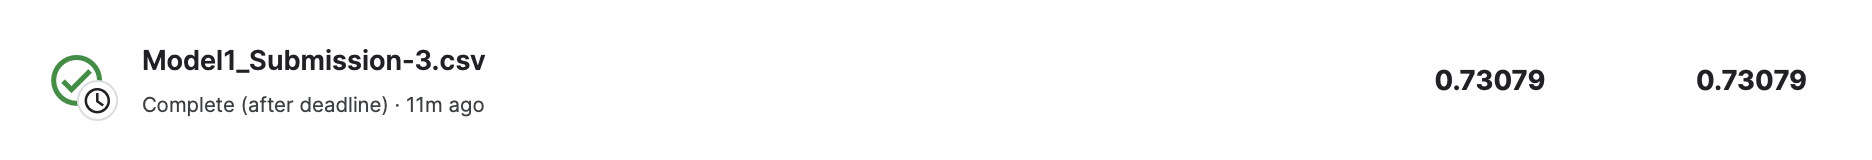

## **Model 2: Word2Vec and LSTM-RNN**

Word2Vec and Recurrent Neural Networks (RNNs), specifically Long Short-Term Memory (LSTM) networks, are powerful tools in natural language processing that are often used together to enhance the understanding and classification of text data.

**Word2Vec Overview:**
Word2Vec consists of models that create word embeddings, which are vectors that place words in a space where the distance between them represents how closely they are related in meaning. The main strength of these embeddings is that they show how words that are used in similar ways are similar in meaning, too. Words found together in texts are closer in this space. In our project, we use Word2Vec to figure out how ingredients are related to each other based on their use in recipes.

**LSTM-RNN Overview:**
RNNs are a type of neural network designed to handle sequential data. Within this category, LSTMs are a special kind of RNN that are capable of learning long-term dependencies. LSTMs are well-suited for text because they can process inputs of varying lengths and maintain an internal state that captures information about the sequence of data they have seen so far. This internal state is managed through structures called gates, which regulate the flow of information to be remembered or forgotten, thereby enabling LSTMs to remember important past information while discarding what is no longer relevant. This makes them ideal for modeling the sequential nature of language and complex dependencies within sequences.

**Combining Word2Vec with LSTM-RNN:**
In the code below, the Word2Vec model is first used to learn vector representations (embeddings) for each ingredient based on their co-occurrence in recipes. These embeddings capture the contextual usage of ingredients, reflecting how similar ingredients are used in different cuisines.

The next step is to incorporate these embeddings into an LSTM-RNN. This is achieved by using an Embedding Layer in the neural network, which is initialized with the Word2Vec embeddings. The Embedding Layer acts as a lookup table that allows the LSTM to understand the context of each ingredient in the sequence it processes.

Here's how the process unfolds in the code:

1. **Preparing the Data**:
   - A list of all unique words (ingredients and cuisines) is compiled.
   - A tokenizer is used to convert the text data into integer tokens, where each integer represents a specific word in the context of the entire dataset.

2. **Padding the Sequences**:
   - The sequences are then padded to ensure they all have the same length, which is necessary for batching the data during model training.

3. **Training Word2Vec**:
   - The Word2Vec model is trained on the sequences of ingredients from the dataset. It is optimised over parameters like vector size, window size, and the number of epochs to improve the learning of embeddings.

4. **Integrating Word2Vec with LSTM-RNN**:
   - The vectors (embeddings) generated by Word2Vec are fed into the Embedding Layer of the LSTM. This allows the LSTM to understand and process the recipes with the learned semantic relationships between ingredients.

By combining Word2Vec with an LSTM-RNN, we capitalize on Word2Vec's sophisticated understanding of ingredient relationships and the LSTM's advanced capability to handle sequential data and long-term dependencies.

### **Word2Vec**

Similar to what we did in Model 1 training, we will follow similar steps here, which are outlined and briefly explained below.

In [ ]:
from gensim.models import Word2Vec

# Refresh the original training and test dataset for this model
data_train = data_train_model2
data_test = data_test_model2

# List to store all words
all_words = []

# Combine all words from 'cleaned_ingredients'columns from Train and Test Datasets

for ingredients in data_train['cleaned_ingredients'].values:
  for word in ingredients:
    if word not in all_words:
      all_words.append(word)

for ingredients in data_test['cleaned_ingredients'].values:
  for word in ingredients:
    if word not in all_words:
      all_words.append(word)

# Calculate totat ingredients in our dataset
num_words = len(all_words)

print("Total Words: ",len(all_words))

Total Words:  7071


Now, we train the Word2Vec model :

In [ ]:
word2vec_model = Word2Vec(
    data_train['cleaned_ingredients'].values, # Ingredients
    workers=4,               # CPU cores
    vector_size=300,         # Dimensions of the word vectors
    window=10,               # Maximum distance between the current and last word within a moving window
    epochs=10)               # Number of iterations over the dataset during training

### **Embedding matrix**

Here, we are creating an "embedding matrix," where each word from the text data is assigned a list of numbers. These numbers come from our Word2Vec model. Word2Vec provides a numerical representation for words based on their usage in language. If Word2Vec does not have information for a particular word, the code leaves that part of the table filled with zeros.

In [ ]:
# Create an empty matrix to store word embeddings
embedding_matrix = np.zeros((num_words, 300))

# Iterate over words and indices in the word_index dictionary
for word, i in word_index.items():
    try:
        # Try to retrieve the word vector from the Word2Vec model
        embedding_matrix[i] = word2vec_model.wv[word]
    except:
        # If the word is not in the Word2Vec model's vocabulary or an error occurs, skip and keep the row as zeros
        pass

### **Label Encoding**

We are using LabelEncoder to convert the 'cuisine' column in the data_train dataset into a numerical format which can be used for model training.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to categorical format
label_encoder = LabelEncoder()
label_encoder.fit(data_train['cuisine'])

train_label = label_encoder.transform(data_train['cuisine'])
train_label = np.array(train_label)

In [ ]:
# Create a Dictionary of Mapped Labels

label_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_name_mapping = pd.DataFrame(list(label_name_mapping.items()), columns=['Original_Label', 'Encoded_Label'])

### **Tokenization**


Similar to what was done in Model 1, we tokenize the ingredients here, which is basically converting the list of ingredient text into a structured numerical format.


In [ ]:
# Create a Tokenizer instance
tokenizer = Tokenizer(num_words=num_words)

# Fit on all words
tokenizer.fit_on_texts(all_words)

# Tokenize the Train and Test data
x_train = []
for data in data_train['cleaned_ingredients']:
    sequence = tokenizer.texts_to_sequences([data])[0]
    x_train.append(sequence)

x_test = []
for data in data_test['cleaned_ingredients']:
    sequence = tokenizer.texts_to_sequences([data])[0]
    x_test.append(sequence)

# Stores reference dictionary to access a word from a index or a index from a word
word_index = tokenizer.word_index

### **Padding**

Here, we apply padding to the tokenized ingredients sequences to ensure consistency in length across all samples.


In [ ]:
# Padding sequences and creating a dataset
max_sequence_length = max(max([len(sequence) for sequence in x_train]),max([len(sequence) for sequence in x_train]))
x_train_pad = pad_sequences(x_train, maxlen=max_sequence_length)
x_test_pad = pad_sequences(x_test, maxlen=max_sequence_length)

x_train_pad = np.array(x_train_pad)
x_test_pad = np.array(x_test_pad)

### **Training-Validation Split**

We split our data into training and test sets which will allow us to evaluate our model.

In [ ]:
# Split the data into training and test sets
data_train, data_val, y_train, y_val = train_test_split(x_train_pad, train_label, test_size=0.2, random_state=42)

### **Model Architecture**

In this section we are using LSTM (Long Short-Term Memory) layers which are great for capturing patterns in long lists, to help the network understand how different ingredients interact in a recipe. To prevent the network from just memorizing the training data (overfitting), Dropout layers are included. These layers randomly ignore parts of the data, helping the network to generalize better to new, unseen recipes. The network is set up with word embeddings, a technique that represents words as numbers in a way that reflects their meaning and relationships. Finally, the network is compiled with specific settings for learning, including a loss function and optimizer, to effectively train on ingredient data and potentially make useful predictions or classifications.

In [ ]:
# LSTM (Long Short-Term Memory) layers are employed to capture long-range dependencies in sequential data, enhancing the model's ability to understand ingredient relationships.
from keras.layers import LSTM

# Dropout layers introduce regularization to neural networks, preventing overfitting and enhancing the model's generalization to new data.
from keras.layers import Dropout

# Initiate a sequential model
model = Sequential()

# Add an Embedding layer with pre-trained word embeddings

model.add(Embedding(num_words,                        # Number of unique words in the vocabulary
                    300,                              # Size of the word embeddings
                    input_length=max_sequence_length, # Length of input sequences
                    weights=[embedding_matrix],       # Initialize the embedding layer with pre-trained embeddings generated using Word2Vec
                    trainable=True))                  # Allow fine-tuning of word embeddings during training

# Add a Long Short-Term Memory (LSTM) layer with 128 units, returning sequences
model.add(LSTM(128, return_sequences=True))

# Add a Dropout layer with a dropout rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

# Add another LSTM layer with 64 units
model.add(LSTM(64))

# Add a Dense layer with 21 units and softmax activation for multiclass classification
model.add(Dense(21, activation='softmax'))

# Compile the model
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 65, 300)           2121300   
                                                                 
 lstm (LSTM)                 (None, 65, 128)           219648    
                                                                 
 dropout (Dropout)           (None, 65, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 21)                1365      
                                                                 
Total params: 2391721 (9.12 MB)
Trainable params: 2391721 (9.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


From the above summary, we can see that the neural network is composed of a few key layers, carefully put together to classify different cuisines based on recipes. Starting with a large embedding layer, the network has over 21 million parameters, which shows it's designed to really understand the details of the ingredients used. Then, it has two LSTM layers, known for their ability to remember and make sense of the order of ingredients, which is important for figuring out what cuisine a recipe might be. There's also a Dropout layer included to make sure the network doesn't just memorize the recipes but can actually apply what it learns to new ones. The whole thing is wrapped up with a Dense layer of 21 units, ready to match the recipes to one of the 21 types of cuisine, using a softmax function to make the final decision.

### **Model Fitting**

Similar to Model 1 , we are implementing pretrained model weights to save processing times. Using those parameters, we fit out second model below:

In [ ]:
drive.mount('/content/drive', force_remount=True)

# Load pre-trained weights (if available)
try:
  model.load_weights('/content/drive/My Drive/model_weight_food2.h5')
  print("\nHey! Pre-trained Model Weights found, continuing training on it...\n")
except:
  pass

# Train the model on the training data for 10 epochs
# We will use a 'batch_size' of 50 as any more samples in a batch makes the fitting process slower while training on weights.
# 'validation_data=(val_seq_pad, y_val)' provides validation data for monitoring performance during training
# model.fit(data_train, y_train, epochs=10, batch_size=50, validation_data=(data_val,y_val))

# Save the trained model weights to a file for future use
# model.save_weights('/content/drive/My Drive/model_weight_food2.h5')

drive.flush_and_unmount()

Mounted at /content/drive

Hey! Pre-trained Model Weights found, continuing training on it...



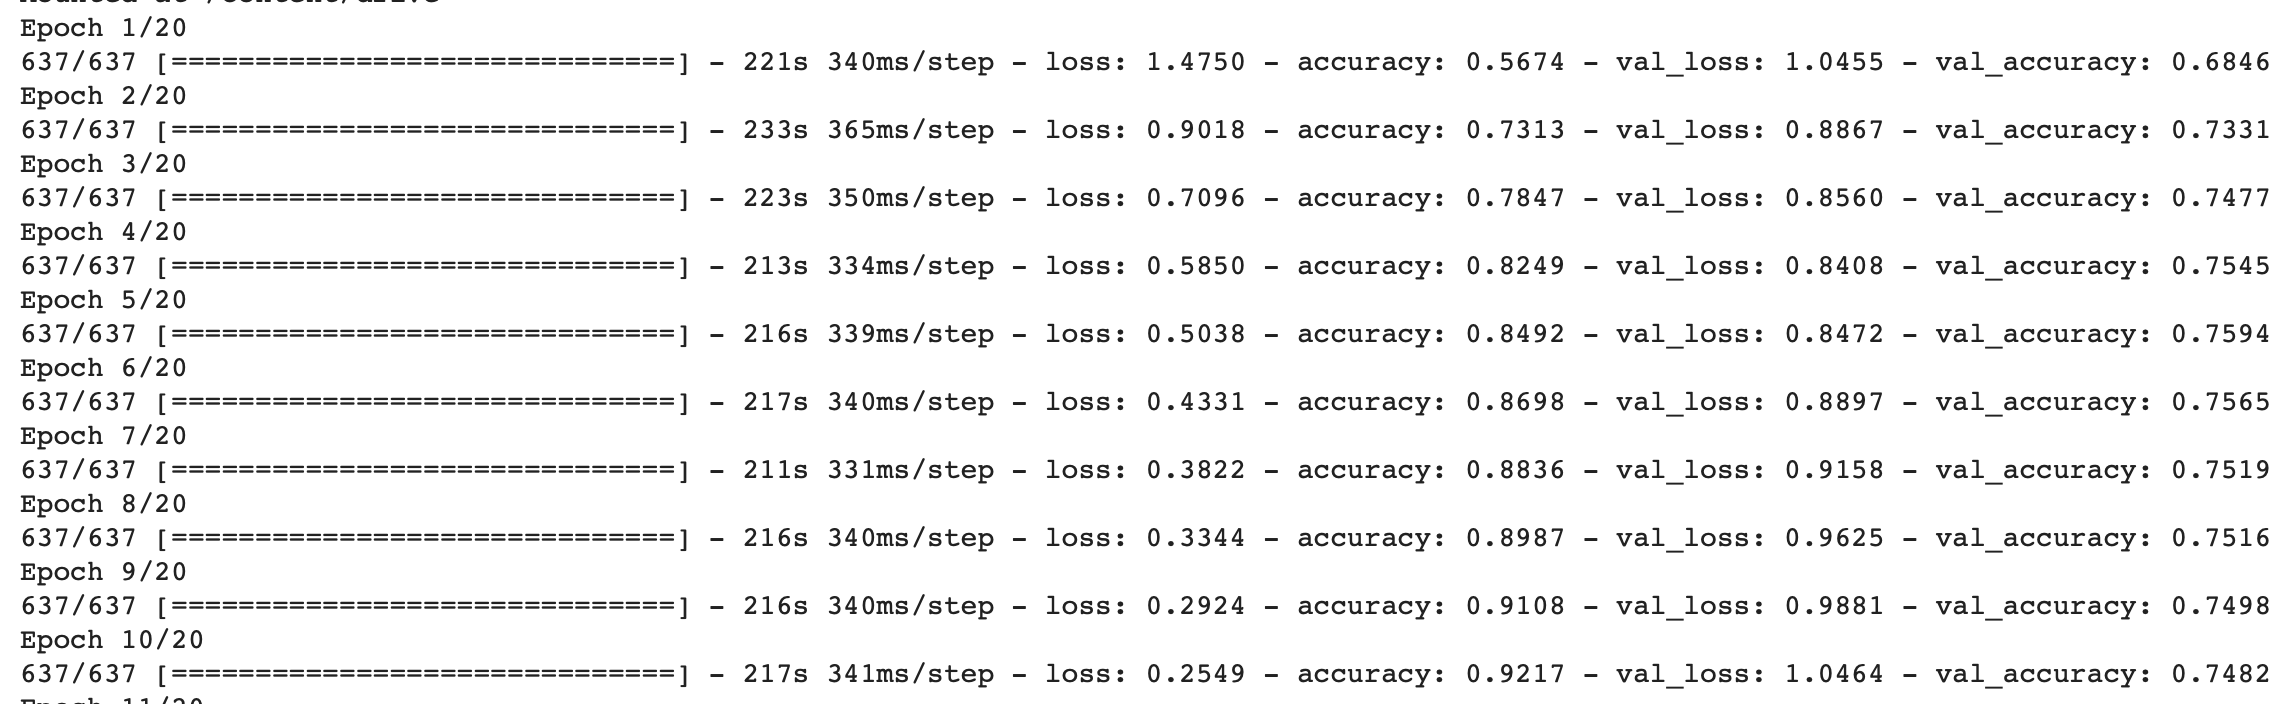

### **Underfitting vs Overfitting**

The idea here is the same as what was explained in Model 1 section. Below is the demonstration of Underfitting and Overfitting in this model's context.

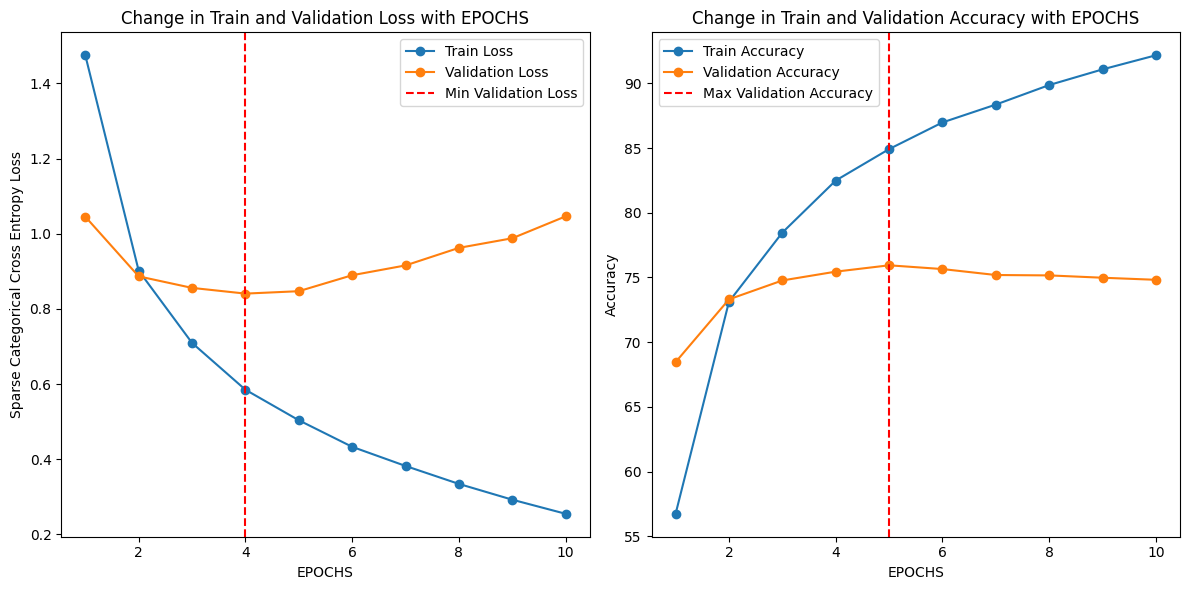

In [ ]:
# Store the training metrics
training_metrics = np.array([['1.475','0.5674','1.0455','0.6846'],
                              ['0.9018','0.7313','0.8867','0.7331'],
                              ['0.7096','0.7847','0.856','0.7477'],
                              ['0.585','0.8249','0.8408','0.7545'],
                              ['0.5038','0.8492','0.8472','0.7594'],
                              ['0.4331','0.8698','0.8897','0.7565'],
                              ['0.3822','0.8836','0.9158','0.7519'],
                              ['0.3344','0.8987','0.9625','0.7516'],
                              ['0.2924','0.9108','0.9881','0.7498'],
                              ['0.2549','0.9217','1.0464','0.7482']])

training_metrics = pd.DataFrame(training_metrics,columns=['Train - Sparse Categorical Cross Entropy Loss','Train - Accuracy','Validation - Sparse Categorical Cross Entropy Loss','Validation - Accuracy'])

training_metrics['Train - Accuracy'] = training_metrics['Train - Accuracy'].astype(float)*100
training_metrics['Validation - Accuracy'] = training_metrics['Validation - Accuracy'].astype(float)*100
training_metrics['Train - Sparse Categorical Cross Entropy Loss'] = training_metrics['Train - Sparse Categorical Cross Entropy Loss'].astype(float)
training_metrics['Validation - Sparse Categorical Cross Entropy Loss'] = training_metrics['Validation - Sparse Categorical Cross Entropy Loss'].astype(float)

custom_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Visual 1: Comparing Train and Validation Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(custom_epochs, training_metrics['Train - Sparse Categorical Cross Entropy Loss'], label='Train Loss', marker='o')
plt.plot(custom_epochs, training_metrics['Validation - Sparse Categorical Cross Entropy Loss'], label='Validation Loss', marker='o')
plt.axvline(x=training_metrics['Validation - Sparse Categorical Cross Entropy Loss'].idxmin()+1, color='r', linestyle='--', label='Min Validation Loss')
plt.legend()
plt.title('Change in Train and Validation Loss with EPOCHS')
plt.xlabel('EPOCHS')
plt.ylabel('Sparse Categorical Cross Entropy Loss')

# Visual 2: Comparing Train and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(custom_epochs, training_metrics['Train - Accuracy'], label='Train Accuracy', marker='o')
plt.plot(custom_epochs, training_metrics['Validation - Accuracy'], label='Validation Accuracy', marker='o')
plt.axvline(x=training_metrics['Validation - Accuracy'].idxmax()+1, color='r', linestyle='--', label='Max Validation Accuracy')
plt.legend()
plt.title('Change in Train and Validation Accuracy with EPOCHS')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

The graphs above provide a clear visual representation of the model's performance across successive training epochs.

In the loss graph, we see the training loss steadily decline, indicating the model is effectively learning from the training set. However, the validation loss decreases only to a certain point before it begins to rise, suggesting the model may start to overfit if trained for too long. The epoch at which the validation loss is at its lowest marks an optimal stopping point before overfitting degrades the model's generalizability.

Looking at the accuracy graph, there's an increase in both training and validation accuracy, showing the model's growing proficiency in classifying correctly. Despite this, the training accuracy surpasses the validation accuracy by a noticeable margin, potentially pointing to overfitting, as the model performs better on the training data compared to the new data it encounters.

Interestingly, the optimal number of epochs for avoiding overfitting appears to differ when comparing the two graphs. The loss graph suggests an earlier stopping point might be ideal (4 epochs), whereas the accuracy graph indicates a slightly later epoch could still yield improvements (5 epochs) without significant overfitting. This is because the results of both these Epochs are very close.

### **Final Model**

Using the optimal number of epochs, we train our final model below:

In [ ]:
drive.mount('/content/drive', force_remount=True)

# Design a neural network architecture with word embeddings
model = Sequential()
model.add(Embedding(num_words, 300, input_length=max_sequence_length, weights=[embedding_matrix], trainable=False))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(21, activation='softmax'))

# Compile the model
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

# Load pre-trained weights (if available)
try:
  model.load_weights('/content/drive/My Drive/model_weight_food2_final.h5')
  print("\nHey! Pre-trained Model Weights found, continuing training on it...\n")
except:
  pass

# Train only till the best epochs determined above
best_epochs = 4

# Fit the model on Both Training AND Validation Dataset
# for e in range(best_epochs):
#   # Train the model
#   model.fit(data_train, y_train, epochs=1, batch_size=50)
#   model.fit(data_val, y_val, epochs=1, batch_size=50)

# Save the trained model weights to a file for future use
# model.save_weights('/content/drive/My Drive/model_weight_food2_final.h5')

drive.flush_and_unmount()

Mounted at /content/drive

Hey! Pre-trained Model Weights found, continuing training on it...



### **Model Evaluation**

Now that we have our final model, for evaluation purpose, we will make predictions on the train data and measure the metrics like accuracy, precision, recall,etc.

In [ ]:
# Perform predictions using the trained model on the training data
prediction = model.predict(data_train)
prediction = pd.DataFrame(prediction)
del prediction[20]

# Create a copy of the prediction DataFrame for further processing
prediction2 = prediction.copy()

# Round predicted probabilities to the nearest integer (0 or 1)
for i in prediction2.columns:
  prediction2[i] = np.where(prediction2[i].round(0)==1,1,prediction2[i])

# This loop helps fix cases in prediction probabilities where the predicted probabilities is less than 50% for all the cuisines
# In that case, this loops selects the cuisine corresponding to maximum probability
for i in prediction2.index:
  if (prediction2.loc[i,:]==1).nunique()==1:
    prediction2.loc[i,prediction2.loc[i,:].argmax()] = 1

# Map binary values to corresponding original labels using label_name_mapping
for i in prediction2.columns:
  try:
    prediction2[i] = np.where(prediction2[i].round(0)==1,label_name_mapping[label_name_mapping['Encoded_Label']==i]['Original_Label'].values[0],0)
  except:
    pass

# Create a new column 'cuisine' to store the predicted cuisine labels
prediction2['cuisine'] = ''

# Assign predicted cuisine labels to the 'cuisine' column based on unique non-zero values in each row
for i in prediction2.index:
  prediction2['cuisine'] = np.where(prediction2.index==i,[j for j in prediction2.iloc[i,:].unique() if j != '0'][0],prediction2['cuisine'])

# Extract the 'cuisine' column and modify specific values where we had removed Underscores during cleaning process
prediction2 = prediction2[['cuisine']]
prediction2['cuisine'] = np.where(prediction2['cuisine']=='southernus','southern_us',prediction2['cuisine'])
prediction2['cuisine'] = np.where(prediction2['cuisine']=='cajuncreole','cajun_creole',prediction2['cuisine'])

prediction2 = np.array(prediction2['cuisine'])

# Encode the ground truth labels using label_name_mapping
y_train_encoded = []
for i in y_train:
  y_train_encoded.append(label_name_mapping[label_name_mapping['Encoded_Label']==i]['Original_Label'].values[0])

y_train_encoded = np.array(y_train_encoded)

995/995 [==============================] - 92s 91ms/step


### **Confusion Matrix and Evaluation Metrics**


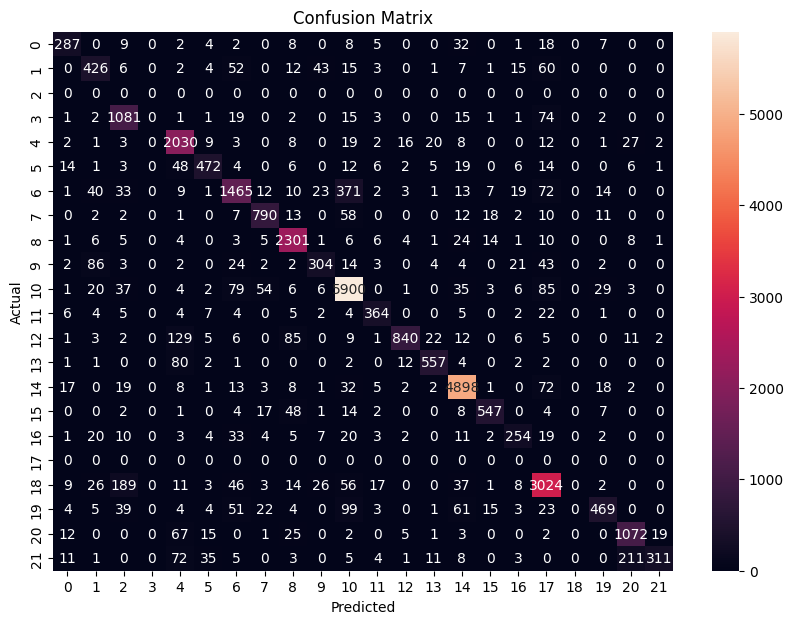

Accuracy: 73.18583236431063
Precision: 0.740657896170143
Recall: 0.7318583236431063
F1-score: 0.7324499012205063
Micro-average AUC: 0.9929250741920548


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Confusion Matrix
conf_matrix = confusion_matrix(y_train_encoded, prediction2)

# Plotting the confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculating Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(y_train_encoded, prediction2) * 100
precision = precision_score(y_train_encoded, prediction2, average='weighted')
recall = recall_score(y_train_encoded, prediction2, average='weighted')
f1 = f1_score(y_train_encoded, prediction2, average='weighted')

# Calculating ROC-AUC
# ROC-AUC is not directly applicable to multi-class classification, so we calculate micro-average ROC-AUC
y_train_one_hot = np.eye(len(np.unique(y_train)))[y_train]  # One-hot encoding
auc = roc_auc_score(y_train_one_hot, prediction, average='micro')

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Micro-average AUC: {auc}')

From the confusion matrix and the metrics seen above, we can deduce the following facts :

**Accuracy:** At approximately 73.18% , it indicates a decent level of overall correct predictions by the model.

**Precision:** At around 0.7406, it shows that the model has a good rate of true positive predictions out of all positive predictions it made, meaning it is reliable when it claims a sample belongs to a certain class.

**Recall:** Also known as sensitivity, the recall is approximately 0.7318, which suggests that the model is fairly capable of identifying all relevant instances within the actual classes.

**F1-score:** With a score close to 0.7324, the model demonstrates a somewhat balanced relationship between precision and recall, indicating moderately strong performance even in imbalanced datasets where some classes are underrepresented.

**Micro-average AUC:** The micro-average AUC score is about 0.99, which is very close to 1.







### **ROC Curve**

Now lets visualize the models performance using the ROC curve

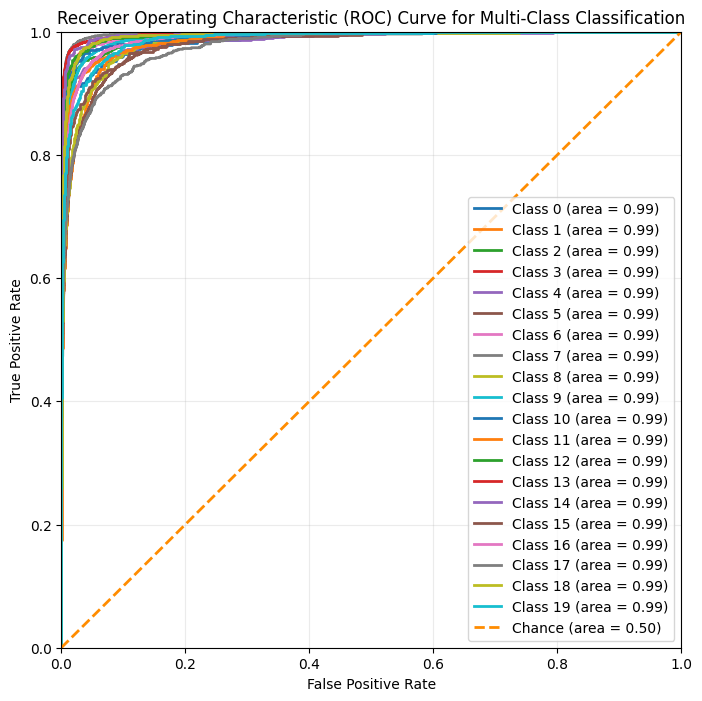

In [ ]:
fpr = dict()
tpr = dict()
micro_auc = dict()

for i in range(len(np.unique(y_train_encoded))):
    fpr[i], tpr[i], _ = roc_curve(y_train_one_hot[:, i], np.array(prediction)[:, i])
    micro_auc[i] = roc_auc_score(y_train_one_hot, prediction, average='micro')

# Plot the ROC curves
plt.figure(figsize=(8, 8))
for i in range(len(np.unique(y_train_encoded))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {micro_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--', label='Chance (area = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.grid(alpha=0.25)
plt.show()

The ROC curve above shows the model's performance in the multi-class classification. With each class's ROC curve showing an Area Under the Curve (AUC) value of 0.99, it tells us that the model has near to perfect ability to correctly identify recipes as belonging to their respective classes. Such high AUC values across all classes suggest that the model is highly accurate, with a very low rate of false positives, meaning it rarely misclassifies a recipe as belonging to the wrong cuisine.

### **Model Predictions**

Now we use the model to make predictions on the test set.

In [ ]:
# Perform predictions using the final model on the test data
prediction = model.predict(x_test_pad)
prediction2 = pd.DataFrame(prediction)
del prediction2[20]

# Round predicted probabilities to the nearest integer (0 or 1)
for i in prediction2.columns:
  prediction2[i] = np.where(prediction2[i].round(0)==1,1,prediction2[i])

# This loop helps fix cases in prediction probabilities where the predicted probabilities is less than 50% for all the cuisines
# In that case, this loops selects the cuisine corresponding to maximum probability
for i in prediction2.index:
  if (prediction2.loc[i,:]==1).nunique()==1:
    prediction2.loc[i,prediction2.loc[i,:].argmax()] = 1

# Map binary values to corresponding original labels using label_name_mapping
for i in prediction2.columns:
  prediction2[i] = np.where(prediction2[i].round(0)==1,label_name_mapping[label_name_mapping['Encoded_Label']==i]['Original_Label'].values[0],0)

# Create a new column 'cuisine' to store the predicted cuisine labels
prediction2['cuisine'] = ''

# Assign predicted cuisine labels to the 'cuisine' column based on unique non-zero values in each row
for i in prediction2.index:
  prediction2['cuisine'] = np.where(prediction2.index==i,[j for j in prediction2.iloc[i,:].unique() if j != '0'][0],prediction2['cuisine'])

# Extract the 'cuisine' column and modify specific values where we had removed Underscores during cleaning process
prediction2 = prediction2[['cuisine']]
prediction2['cuisine'] = np.where(prediction2['cuisine']=='southernus','southern_us',prediction2['cuisine'])
prediction2['cuisine'] = np.where(prediction2['cuisine']=='cajuncreole','cajun_creole',prediction2['cuisine'])

drive.mount('/content/drive', force_remount=True)

# Read test IDs from a Test Data JSON file and join them with the predictions
test_id = pd.read_json(test_file_path)
test_id = test_id[['id']]
prediction2 = test_id.join(prediction2)

# Save the final predictions to a CSV file in Google Drive
prediction2.to_csv('/content/drive/My Drive/Model2_Submission.csv', index=False)

drive.flush_and_unmount()

311/311 [==============================] - 24s 78ms/step
Mounted at /content/drive


In [ ]:
prediction2

,id,cuisine
0,18009,british
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian
...,...,...
9939,30246,italian
9940,36028,southern_us
9941,22339,italian
9942,42525,southern_us


Similar to what we did in Model 1 section, in above code, after making predictions on the test set using our model, these predictions were cleaned up and prepared for submission to the Kaggle competition. The predicted categories were matched with their original names and combined with the test data IDs to meet the submission format. Once this was done, the file was uploaded to Kaggle's website to see how well the model performed.

**Result on Kaggle:**

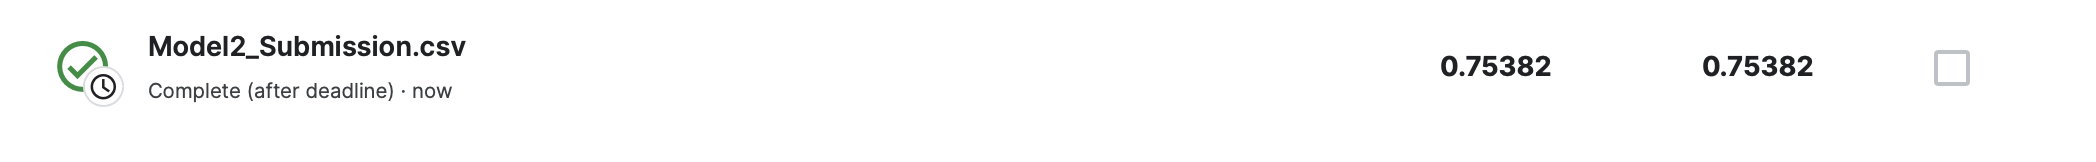

# **MODEL COMPARISON and CONCLUSION**

Upon comparing the two models used for predicting cuisine types from a list of ingredients, Model 2 seems to be performing better based on specific metrics. Model 1, which uses a SimpleRNN, shows an accuracy of 71.87%, precision of 0.7282, recall of 0.7187, F1-score of 0.7193, and a notably high micro-average AUC of 0.9908. These figures suggest that while the model is quite good at distinguishing between classes, it is not as accurate in its predictions as one might desire.

Model 2, however, which combines Word2Vec with an LSTM network, demonstrates improved performance with an accuracy of 73.18%, precision of 0.7406, recall of 0.7318, and F1-score of 0.7324, along with a ROC-AUC of 0.9929. The higher accuracy and precision here indicate a more reliable model in its predictions, and the outstanding ROC-AUC value shows exceptional capability in class separation.

Upon employing these models with optimal parameters for final predictions on test data, as reflected in the Kaggle Leaderboard scores, Model 1 achieved 0.73079 while Model 2 performed better with a score of 0.75382. This outcome indicates that Model 2's complex architecture, with enhanced word representation and memory capabilities, not only helps in a better understanding of the sequential data but also translates into more accurate real-world predictions. The use of dropout and an additional LSTM layer in Model 2 likely contributes to its robustness, leading to its higher performance despite the increased complexity and computational demands.